In [1]:
from sklearn.datasets import load_digits

In [2]:
dir(load_digits())

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [3]:
data = load_digits().data
images = load_digits().images
targets = load_digits().target

In [4]:
data.shape

(1797, 64)

In [5]:
images.shape

(1797, 8, 8)

In [6]:
targets.shape

(1797,)

In [7]:
images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [8]:
images[445].reshape(-1,64)

array([[ 0.,  0.,  3., 10., 13.,  7.,  0.,  0.,  0.,  1., 14., 13., 15.,
        14.,  0.,  0.,  0.,  0., 15.,  5., 14.,  9.,  0.,  0.,  0.,  0.,
         0., 10., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  7., 14., 16.,  3.,
         0.,  0.,  4.,  5.,  0.,  2., 16.,  4.,  0.,  0., 10., 16., 10.,
         8., 16.,  3.,  0.,  0.,  0.,  5., 12., 14.,  8.,  0.,  0.]])

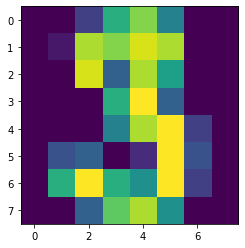

In [9]:
import matplotlib.pyplot as plt
plt.imshow( images[445] )

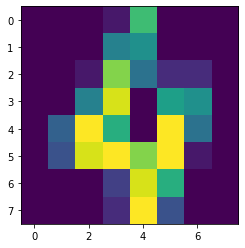

In [10]:
plt.imshow( images[4] )

8


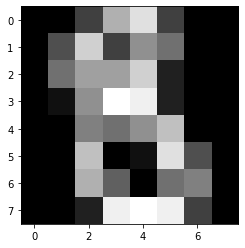

In [11]:
index=378
plt.imshow( images[ index ], cmap="gray")
print(targets[index])

In [12]:
X = images.reshape(-1, 64)
y = targets

In [13]:
X[445]

array([ 0.,  0.,  3., 10., 13.,  7.,  0.,  0.,  0.,  1., 14., 13., 15.,
       14.,  0.,  0.,  0.,  0., 15.,  5., 14.,  9.,  0.,  0.,  0.,  0.,
        0., 10., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  7., 14., 16.,  3.,
        0.,  0.,  4.,  5.,  0.,  2., 16.,  4.,  0.,  0., 10., 16., 10.,
        8., 16.,  3.,  0.,  0.,  0.,  5., 12., 14.,  8.,  0.,  0.])

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.3, random_state=7)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 5)

In [16]:
model.fit(X_train, y_train)

KNeighborsClassifier()

In [17]:
model.predict(X_test[:20])

array([6, 0, 5, 3, 2, 9, 0, 4, 1, 0, 1, 8, 2, 5, 2, 8, 1, 8, 9, 1])

In [18]:
y_test[:20]

array([6, 0, 5, 9, 2, 9, 0, 4, 1, 0, 1, 8, 2, 5, 2, 8, 1, 8, 9, 1])

In [19]:
model.score(X_test, y_test)

0.9713831478537361

In [20]:
test_sizes = [.1, .2, .3, .4, .5, .6, .7, .8, .9]
score_list = []
value_of_k = 5

for size in test_sizes:
    
    #splitting data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=7)
    
    #creating model
    model = KNeighborsClassifier(value_of_k)
    
    #fitting of train
    model.fit(X_train, y_train)
    
    #take out score
    score = model.score(X_test, y_test)
    
    #append to score list
    score_list.append(score)
    

In [21]:
score_list

[0.9555555555555556,
 0.975,
 0.9777777777777777,
 0.9791376912378303,
 0.978865406006674,
 0.9786839666357738,
 0.9713831478537361,
 0.9513212795549374,
 0.9128553770086527]

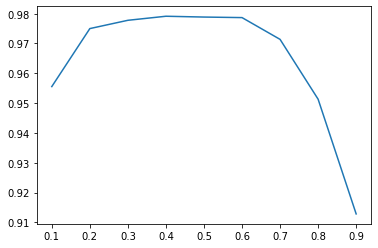

In [22]:
plt.plot(test_sizes, score_list)

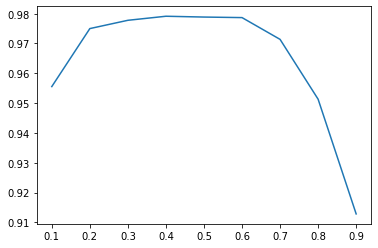

In [23]:
plt.plot(test_sizes, score_list)

# plot scores wrt different value of K in knn(score should be taken with random split of 5data averaged)

In [24]:
test_sizes = [.1, .2, .3, .4, .5, .6, .7, .8, .9]
mean_score_list = []
size = .4

for value_of_k in range(1,31):
    
    score_list = []
    for i in range(10):
        
        #creating model
        model = KNeighborsClassifier(value_of_k)
    
        #splitting data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=7)
        
    
        #fitting of train
        model.fit(X_train, y_train)
    
        #take out score
        score = model.score(X_test, y_test)
    
        #append to score list
        score_list.append(score)
        
    mean_score = sum(score_list)/10
    mean_score_list.append(mean_score)
    

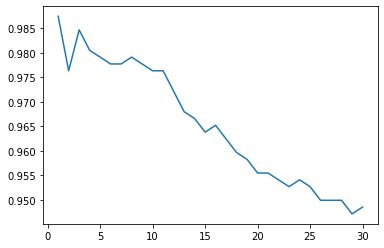

In [25]:
plt.plot(range(1,31), mean_score_list)

In [26]:
from sklearn.metrics import confusion_matrix
c_matrix = confusion_matrix(y_test, model.predict(X_test))

In [27]:
c_matrix

array([[70,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 71,  2,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 69,  0,  0,  0,  0,  1,  3,  0],
       [ 0,  0,  0, 70,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 72,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0, 59,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 69,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 70,  0,  0],
       [ 0,  7,  3,  3,  0,  2,  1,  0, 68,  0],
       [ 0,  1,  0,  0,  0,  2,  0,  4,  1, 64]], dtype=int64)

In [28]:
wrong_prediction_of_1_X_test = X_test[ (y_test != model.predict(X_test)) & (model.predict(X_test)==1)]
wrong_prediction_of_1_X_test

array([[ 0.,  0.,  0.,  1., 12., 16., 14.,  0.,  0.,  0.,  3., 14., 13.,
        15., 13.,  0.,  0.,  4., 16., 15., 13., 16.,  4.,  0.,  0.,  3.,
        16., 16., 16., 16.,  3.,  0.,  0.,  0.,  7.,  7., 14., 14.,  0.,
         0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.,  0.,  0.,  0.,
        13., 10.,  0.,  0.,  0.,  0.,  0.,  0., 13., 12.,  0.,  0.],
       [ 0.,  0.,  1.,  8., 13.,  1.,  0.,  0.,  0.,  0.,  6., 16., 16.,
         9.,  0.,  0.,  0.,  1., 15., 16., 16., 10.,  0.,  0.,  0.,  6.,
        15., 14.,  6.,  0.,  0.,  0.,  0.,  3.,  7.,  6.,  6.,  0.,  0.,
         0.,  0.,  1., 10.,  2., 11.,  0.,  0.,  0.,  0.,  0.,  4., 11.,
        13.,  2.,  0.,  0.,  0.,  0.,  0.,  5., 12.,  5.,  0.,  0.],
       [ 0.,  0.,  2.,  8.,  7.,  0.,  0.,  0.,  0.,  0.,  6., 15., 16.,
         2.,  0.,  0.,  0.,  6., 15., 11., 16.,  4.,  0.,  0.,  0.,  5.,
        16., 10., 16.,  1.,  0.,  0.,  0.,  2., 15., 16., 13.,  0.,  0.,
         0.,  0.,  0.,  2., 16., 12.,  9.,  3.,  0.,  0.,  

In [29]:
wrong_prediction_of_1_X_test = X_test[ (y_test != model.predict(X_test)) & (model.predict(X_test)==1)]
wrong_prediction_of_1_X_test_image = wrong_prediction_of_1_X_test.reshape(-1,8,8)

In [30]:
wrong_prediction_of_1_X_test_image.shape

(9, 8, 8)

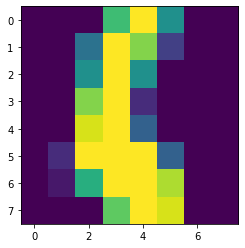

In [31]:
plt.imshow(wrong_prediction_of_1_X_test_image[3])

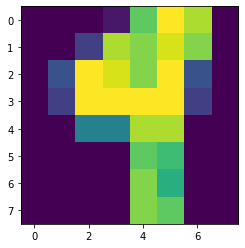

In [32]:
plt.imshow(wrong_prediction_of_1_X_test_image[0])